In [ ]:
!pip install tensorflow

In [ ]:
!pip install cv2


In [33]:
from keras.preprocessing.image import ImageDataGenerator

# Directories for your train and validation datasets
train_dir = '.\in'
validation_dir = '.\est'

# Dimensions to which to resize input images
image_size = (48, 48)
# image_size = (224, 224)# for ggogle net model
# Batch size
batch_size = 32

# # Rescale pixel values from [0, 255] to [0, 1]
# datagen = ImageDataGenerator(rescale=1./255)

# # Generator for the training data
# train_generator = datagen.flow_from_directory(
#     train_dir,
#     target_size=image_size,
#     batch_size=batch_size,
#     color_mode='grayscale',  # because the FER2013 images are grayscale
#     class_mode='categorical'  # because we have multiple classes (emotions)
# )

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,       # rescale pixel values from [0, 255] to [0, 1]
    rotation_range=20,    # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.2,       # randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
)

# Generator for the training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Generator for the validation data
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
!pip install keras


In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 is the number of classes (emotions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # for example
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
model.save('emotion_model.h5')

Epoch 1/10
898/898 [==============================] - 208s 231ms/step - loss: 1.8000 - accuracy: 0.2531 - val_loss: 1.7758 - val_accuracy: 0.2559
Epoch 2/10
898/898 [==============================] - 175s 195ms/step - loss: 1.7531 - accuracy: 0.2746 - val_loss: 1.7368 - val_accuracy: 0.2882
Epoch 3/10
898/898 [==============================] - 197s 219ms/step - loss: 1.7061 - accuracy: 0.3043 - val_loss: 1.6583 - val_accuracy: 0.3310
Epoch 4/10
898/898 [==============================] - 51s 57ms/step - loss: 1.6321 - accuracy: 0.3503 - val_loss: 1.5734 - val_accuracy: 0.3752
Epoch 5/10
898/898 [==============================] - 51s 57ms/step - loss: 1.5483 - accuracy: 0.3954 - val_loss: 1.5244 - val_accuracy: 0.4028
Epoch 6/10
898/898 [==============================] - 50s 56ms/step - loss: 1.5003 - accuracy: 0.4167 - val_loss: 1.4663 - val_accuracy: 0.4384
Epoch 7/10
898/898 [==============================] - 50s 56ms/step - loss: 1.4637 - accuracy: 0.4315 - val_loss: 1.4254 - val_acc

C:\Users\Dinkar Yadav\anaconda3\envs\pythonProject\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install pillow

Epoch 1/25
957/957 [==============================] - 248s 258ms/step - loss: 1.8240 - accuracy: 0.2413 - val_loss: 1.8120 - val_accuracy: 0.2207
Epoch 2/25
957/957 [==============================] - 238s 249ms/step - loss: 1.7963 - accuracy: 0.2503 - val_loss: 1.7763 - val_accuracy: 0.2538
Epoch 3/25
957/957 [==============================] - 238s 249ms/step - loss: 1.7736 - accuracy: 0.2609 - val_loss: 1.7563 - val_accuracy: 0.2708
Epoch 4/25
957/957 [==============================] - 215s 225ms/step - loss: 1.7602 - accuracy: 0.2711 - val_loss: 1.7304 - val_accuracy: 0.2867
Epoch 5/25
957/957 [==============================] - 83s 87ms/step - loss: 1.7462 - accuracy: 0.2799 - val_loss: 1.7207 - val_accuracy: 0.2907
Epoch 6/25
957/957 [==============================] - 47s 49ms/step - loss: 1.7242 - accuracy: 0.2891 - val_loss: 1.6780 - val_accuracy: 0.3096
Epoch 7/25
957/957 [==============================] - 139s 145ms/step - loss: 1.6980 - accuracy: 0.3045 - val_loss: 1.6419 - val

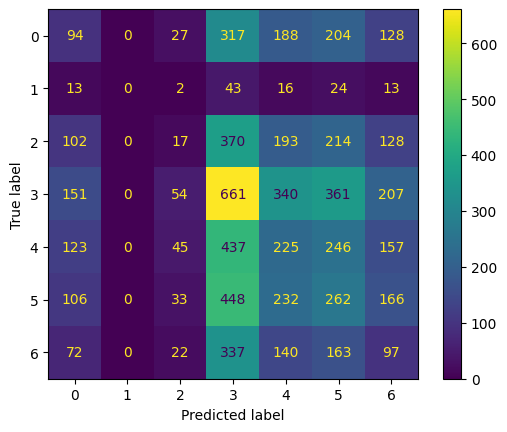

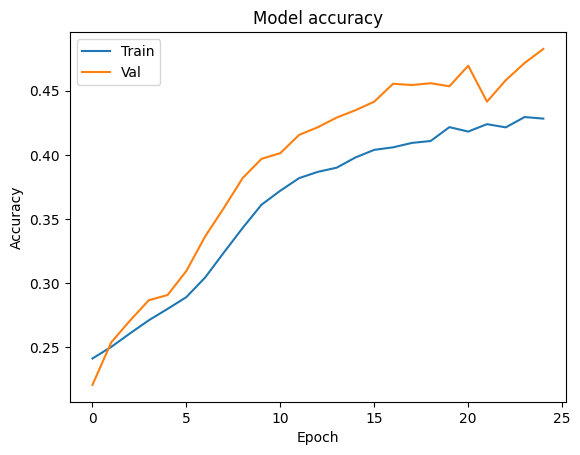

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.   metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after first pooling layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after second pooling layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after third pooling layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer before final layer

model.add(Dense(7, activation='softmax'))  # 7 is the number of classes (emotions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,  # for example
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

model.save('emotion_model.keras')

# Number of classes
num_classes = 7

# Predict the classes on the validation dataset
Y_pred = model.predict(validation_generator, len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Get the true class labels
y_true = validation_generator.classes

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
cmd.plot()

# Plot the training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
!pip install -U scikit-learn

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
# from keras.optimizers import Adam
# from keras.callbacks import Callback, ModelCheckpoint
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # Custom callback for accuracy comparison after each epoch
# class AccuracyComparisonCallback(Callback):
#     def __init__(self, validation_generator):
#         super(AccuracyComparisonCallback, self).__init__()
#         self.validation_generator = validation_generator
# 
#     def on_epoch_end(self, epoch, logs=None):
#         Y_pred = self.model.predict(self.validation_generator, len(self.validation_generator))
#         y_pred = np.argmax(Y_pred, axis=1)
#         y_true = self.validation_generator.classes
# 
#         accuracy = accuracy_score(y_true, y_pred)
# 
#         print(f'Validation accuracy: {logs["val_accuracy"]}, Predicted accuracy: {accuracy}')
# 
# # # Define the model
# # model = Sequential()
# # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
# # model.add(MaxPooling2D((2, 2)))
# # model.add(Dropout(0.25))  # Dropout layer after first pooling layer
# # 
# # model.add(Conv2D(64, (3, 3), activation='relu'))
# # model.add(MaxPooling2D((2, 2)))
# # model.add(Dropout(0.25))  # Dropout layer after second pooling layer
# # 
# # model.add(Conv2D(64, (3, 3), activation='relu'))
# # model.add(Flatten())
# # model.add(Dense(64, activation='relu'))
# # model.add(Dropout(0.5))  # Dropout layer before final layer
# # 
# # model.add(Dense(7, activation='softmax'))  # 7 is the number of classes (emotions)
# 
# # Define the model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
# model.add(BatchNormalization())  # Batch normalization layer
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))  # Dropout layer after first pooling layer
# 
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())  # Batch normalization layer
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))  # Dropout layer after second pooling layer
# 
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())  # Batch normalization layer
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))  # Dropout layer before final layer
# 
# model.add(Dense(7, activation='softmax'))  # 7 is the number of classes (emotions)
# 
# 
# # Compile the model
# model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 
# # Specify the checkpoint file and define the ModelCheckpoint callback
# checkpoint_filepath = 'model.{epoch:02d}-{val_loss:.2f}.h5'
# model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=False)
# 
# accuracy_comparison_callback = AccuracyComparisonCallback(validation_generator)
# 
# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=50,  # for example
#     validation_data=validation_generator,
#     validation_steps=len(validation_generator),
#     callbacks=[model_checkpoint_callback, accuracy_comparison_callback]
# )
# 
# model.save('emotion_model.h5')
# 
# # Number of classes
# num_classes = 7
# 
# # Predict the classes on the validation dataset
# Y_pred = model.predict(validation_generator, len(validation_generator))
# y_pred = np.argmax(Y_pred, axis=1)
# 
# # Get the true class labels
# y_true = validation_generator.classes
# 
# # Create a confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# 
# # Display the confusion matrix
# cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
# cmd.plot()
# 
# # Plot the training and validation accuracy
# plt.figure()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import Callback, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after first pooling layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after second pooling layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer before final layer

model.add(Dense(7, activation='softmax'))  # 7 is the number of classes (emotions)


# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Train the model with the added callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stop, reduce_lr]
)

model.save('emotion_model1.keras')

# Number of classes
num_classes = 7

# Predict the classes on the validation dataset
Y_pred = model.predict(validation_generator, len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Get the true class labels
y_true = validation_generator.classes

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
cmd.plot()

# Plot the training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


MAIN MODEL

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Number of classes
num_classes = 7
model=load_model('emotion_model.h5')
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))

# Convert accuracy to percentage
accuracy_percentage = validation_accuracy * 100

print(f'Validation accuracy: {accuracy_percentage:.2f}%')

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
cmd.plot()

# Plot the training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
from mtcnn import MTCNN
import cv2
import numpy as np
from keras.models import load_model

# Load pre-trained emotion classification model
emotion_model = load_model('emotion_model.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the image
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    cv2.imshow("Press 'q' or 'Q' to take a picture", frame)

    key = cv2.waitKey(1)
    if key & 0xFF == ord('q') or key & 0xFF == ord('Q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

detector = MTCNN()

# Convert to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = detector.detect_faces(frame)

# Loop over all detected faces
for person in faces:
    bounding_box = person['box']

    x, y, w, h = bounding_box

    # Extract face
    face = gray[y:y+h, x:x+w]

    # Resize and normalize the face image to the size your emotion model expects
    face = cv2.resize(face, (48, 48))
    face = face / 255.0

    # The model expects a 4D tensor, so expand dimensions
    face = np.expand_dims(face, axis=(0, -1))

    # Predict emotion
    emotion = emotion_model.predict(face)

    # Get the emotion label
    emotion_label = emotion_labels[np.argmax(emotion)]

    # Print the emotion label
    print(emotion_label)

    # Draw the bounding box of the face along with the emotion label
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the image
cv2.imshow('Image', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 70ms/step
Sad


In [1]:
import cv2
import numpy as np
from keras.models import load_model
from yolov4.tf import yolov4

# Load pre-trained emotion classification model
emotion_model = load_model('emotion_model.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize YOLOv4
yolo = YOLOv4()

# Load YOLOv4 pre-trained weights
yolo.load_weights('yolov4.weights', weights_type="yolo")

# Load the image
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Perform object detection using YOLOv4
    results = yolo.predict(frame)
    boxes, scores, classes, num_boxes = results

    # Loop over all detected objects
    for i in range(num_boxes[0]):
        if int(classes[0][i]) == 0:  # Assuming class index 0 represents a person
            box = boxes[0][i]

            x, y, w, h = int(box[0]), int(box[1]), int(box[2] - box[0]), int(box[3] - box[1])

            # Extract face
            face = frame[y:y + h, x:x + w]

            # Convert the face to grayscale for emotion detection
            gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

            # Resize and normalize the face image to the size your emotion model expects
            face = cv2.resize(gray_face, (48, 48)) / 255.0

            # The model expects a 4D tensor, so expand dimensions
            face = np.expand_dims(face, axis=(0, -1))

            # Predict emotion
            emotion = emotion_model.predict(face)

            # Get the emotion label
            emotion_label = emotion_labels[np.argmax(emotion)]

            # Draw the bounding box of the person along with the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Press 'q' or 'Q' to take a picture", frame)

    key = cv2.waitKey(1)
    if key & 0xFF == ord('q') or key & 0xFF == ord('Q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'yolov4'

In [ ]:
!pip install yolov4

In [ ]:
!pip install cv2

In [ ]:
!pip install opencv-python


In [ ]:
!pip install yolov4